<a href="https://colab.research.google.com/github/karracaye/karracaye/blob/main/helpdesk_shits_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neologdn unidic-lite fugashi
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 565 kB/s 
     |████████████████████████████████| 47.4 MB 1.5 MB/s 
     |████████████████████████████████| 615 kB 55.4 MB/s 
  Created wheel for neologdn: filename=neologdn-0.5.1-cp38-cp38-linux_x86_64.whl size=178322 sha256=fd25a993619e91273e7c5153fb516031821dcb2144720d98d58dccbf0fd9d3d2
  Stored in directory: /root/.cache/pip/wheels/3e/db/10/b3b26caa63c5da86ea3a25043cc4379a66bb3dd30d6f060a37
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658837 sha256=28375d9f9e4493547c404ea5d28cfb2074cc9fef5aea37115d99c813883b2bc3
  Stored in directory: /root/.cache/pip/wheels/8c/dd/8f/e21fc192dcd38ae31e1185ce4e66e12df4e811e3d469866e15
Successfully built neologdn unidic-lite


### Importing

In [ ]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))# libraries

from fugashi import Tagger
import pandas as pd
import neologdn
from nltk.corpus import stopwords
import numpy as np
from time import time 
import spacy
import nltk
from datetime import datetime
import pandas as pd
import fugashi

In [ ]:
# Load and mount the google drive to fetch datasets
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Configuration

In [ ]:
gdrivePath = "/content/gdrive/MyDrive/Colab Notebooks/"
data2021 = pd.read_excel(gdrivePath + 'database_balance.xlsx')

In [ ]:
data2021.shape

In [ ]:
# One `Description` One `Category`
common = []
for col in data2021.columns:
    if col not in common:
        common.append(col)

length = len(common)
print(common)
common_columns = []
for comm in common:
    if comm in data2021.columns:
        common_columns.append(comm)
        print(comm)

# Remove other columns
# Uniform categories
combined = data2021[['Description', 'Category']]
combined['Category'] = combined['Category'].str.lower()
combined2 = combined[ (combined.Description != '') | (combined.Category != '') ]

In [ ]:
# Natural Language Processing training data
timer = str(datetime.now())
start = time() 

# Extracting the text from data frame 
texts = combined2.loc[:,'Description'] 
print(texts)
sizeof = len(texts)
# print(texts.dtypes)
tagger = Tagger('-Owakati')
# define empty lists
non_filtered_sentence =[]
hexy = []
del_words = []
new_list=[]

# #importing stopwords from copura
#stop_words = stopwords.words('english')
f = open(gdrivePath + "/Karra Colab Notebooks/english", "r")
stop_words = [f.read()]
del_words.append(stop_words) # append a list for adeltion words
#Lemmitization by spacy for words 
nlp = spacy.load("en_core_web_sm")
# #print(stop_words)
# # Normalize the text for if any text is repeating 2 times 
for text in texts:
    
     text = neologdn.normalize(text, repeat=0)
     text = ''.join([i for i in text if i.isalpha() or i.isspace()])
     #print(text)
     tokens = tagger.parse(text).replace(" ", ",")
     non_filtered_sentence.append(tokens)
     
     #print(tokens)
end = time()  
  
print("normalizing done", end-start)
print(texts)

In [ ]:
non_filtered_sentence

In [ ]:
start = time() 
for word in non_filtered_sentence:
     word = word.split(",")
     new_list.append(word)
    
count=0
dexy= []
mensai_text=[]

In [ ]:
start = time() 
# filter stop words in parsed text and lametize it

for list in new_list:
     filtered = []
     count+=1
     if count >5000:
         sizeof = sizeof-5000
         print("remaining .... ", sizeof)
         count=0
     for wordy in list:
         if wordy not in stop_words:
             #nlp(wordy)
             
             filtered.append(wordy)
             
     hexy.append(filtered)
     dexy.append(wordy)
     
for list in hexy: 
    #print(list)
    newlst = (",".join(list))
    mensai_text.append(newlst)

len(mensai_text)
end = time()
print(", Lamitization and stopword filter done in ", end-start)
# to check the frequency distribution of words


, Lamitization and stopword filter done in  0.06814193725585938


In [ ]:
most_common = []
long_string= " ".join(map(str,dexy))    
fdist = nltk.FreqDist(dexy)    
print("\n# FreqDist")



# FreqDist


[('en', 353), ('regards', 328), ('thanks', 280), ('engineer', 269), ('manager', 237), ('developer', 167), ('you', 164), ('thank', 157), ('ext', 155), ('officer', 151), ('lead', 149), ('administrator', 139), ('tester', 119), ('analyst', 82), ('consultant', 70), ('specialist', 61), ('msg', 54), ('requests', 37), ('zone', 36), ('head', 34), ('district', 32), ('folder', 30), ('mobile', 29), ('area', 28), ('resolutions', 27), ('messages', 27), ('days', 26), ('leader', 26), ('main', 24), ('payable', 23), ('hub', 23), ('client', 21), ('mob', 19), ('notified', 19), ('by', 19), ('north', 19), ('accountant', 18), ('phone', 18), ('details', 18), ('coordinator', 17), ('master', 17), ('number', 16), ('suppress', 16), ('print', 15), ('image', 15), ('director', 15), ('omissions', 14), ('managed', 14), ('infrastructure', 13), ('or', 13)]


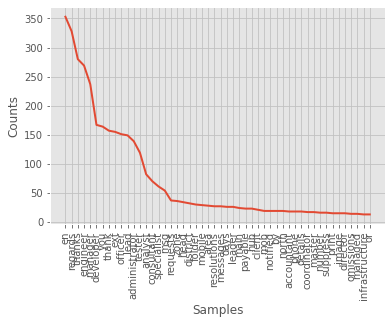

[[('en', 353), ('regards', 328), ('thanks', 280), ('engineer', 269), ('manager', 237), ('developer', 167), ('you', 164), ('thank', 157), ('ext', 155), ('officer', 151)]]


In [ ]:
check_num = 50
print(fdist.most_common(check_num))
fdist.plot(check_num)
most_common.append(fdist.most_common(10))
start = time() 
print(most_common)



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel(gdrivePath + 'database_balance.xlsx')

comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Description:


  val = str(val)

  tokens = val.split()

  for i in range(len(tokens)):
    token[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
            background_color = "white",
            stopwords = stopwords,
            min_font_size = 10). generate(comment_words)


plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

NameError: ignored

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def StopLemmaRemoval(sentences):
  nlp = spacy.load("en_core_web_sm")
  f = open(gdrivePath + "/Karra Colab Notebooks/english", "r")
  stop_words = [f.read()]
  punctuation = "、＜。＞・？’”；：「｛」｝￥｜＝＋－＿）（＊＆＾％＄＃＠！～‘１２３４５６７８９０'\u3000'⇔//"
  array = sentences.to_numpy(dtype = str)
  tagger = fugashi.Tagger()
  cleaned_array = []
  count = 0
  sizeof = len(sentences)
  for text in array:
    count+=1
    if count > 500:
      sizeof = sizeof - 500
      print("Remaining is ", sizeof)
      count = 0
    clean_text = []
    words = [word.surface for word in tagger(str(text))]
    for word in words:
      if word not in stop_words:
        if word not in punctuation:
          clean_text.append(word)
    finallycleaned = ""
    clean_sen = " ".join(clean_text)
    clean_lemma = []
    doc = nlp(clean_sen)
    for token in doc:
      if not token.lemma_.isnumeric():
        clean_lemma.append(token.lemma_) 
    cleaned_array.append(' '.join(clean_lemma))
  return cleaned_array

In [ ]:
Meisei = StopLemmaRemoval(combined2['Description'])

Remaining is  4300
Remaining is  3800
Remaining is  3300
Remaining is  2800
Remaining is  2300
Remaining is  1800
Remaining is  1300
Remaining is  800
Remaining is  300


In [ ]:
X = pd.DataFrame(Meisei)
Y = combined2['Category']

In [ ]:
df4 = pd.concat([X,Y], axis=1)

### Transformer Block

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model
import numpy as np
import warnings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), 
             Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df4[0], df4['Category'], test_size=0.2, random_state=42,stratify = df4['Category'], shuffle = True)
print(X_train.shape, X_test.shape)

(3840,) (960,)


In [ ]:
import numpy as np

import keras

from keras.models import Model
from keras.layers import Dense, Activation, concatenate, Embedding, Input
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


vectorizer = TfidfVectorizer(max_features=300)
vectorizer = vectorizer.fit(X_train)
df_train = vectorizer.transform(X_train)

In [ ]:
n_most_common_words = 10771
max_len = 35
tokenizer = Tokenizer(num_words=n_most_common_words)
tokenizer.fit_on_texts(X_train.values.ravel())
sequences = tokenizer.texts_to_sequences(X_train.values.ravel())
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len)

Found 6570 unique tokens.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras import regularizers

ydf = y_train
y = ydf.to_numpy()
test_list = []
for ele in y:
    test_list.append(str(ele))
Yencoder = LabelEncoder()
target_encoded_train = Yencoder.fit_transform(test_list)
y_encoded_train = target_encoded_train
labels_train = to_categorical(y_encoded_train)

In [ ]:
embed_dim = 200  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 100  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(max_len,))

embedding_layer = TokenAndPositionEmbedding(max_len, n_most_common_words, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(80, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.2)(x)

outputs = Dense(3, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 token_and_position_embeddin  (None, 35, 200)          2161200   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 35, 200)          362500    
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 200)               0     

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    X,
    labels_train, 
    batch_size=500,
    epochs=15,
    validation_split=0.2
)

Epoch 1/15
7/7 [==============================] - 4s 98ms/step - loss: 1.0958 - accuracy: 0.4111 - val_loss: 1.0380 - val_accuracy: 0.4479
Epoch 2/15
7/7 [==============================] - 0s 36ms/step - loss: 1.0009 - accuracy: 0.4753 - val_loss: 0.8736 - val_accuracy: 0.6068
Epoch 3/15
7/7 [==============================] - 0s 36ms/step - loss: 0.8322 - accuracy: 0.5993 - val_loss: 0.6310 - val_accuracy: 0.6758
Epoch 4/15
7/7 [==============================] - 0s 36ms/step - loss: 0.6760 - accuracy: 0.6761 - val_loss: 0.5628 - val_accuracy: 0.7305
Epoch 5/15
7/7 [==============================] - 0s 36ms/step - loss: 0.5397 - accuracy: 0.7474 - val_loss: 0.4137 - val_accuracy: 0.8216
Epoch 6/15
7/7 [==============================] - 0s 36ms/step - loss: 0.4211 - accuracy: 0.8203 - val_loss: 0.3595 - val_accuracy: 0.8451
Epoch 7/15
7/7 [==============================] - 0s 37ms/step - loss: 0.3364 - accuracy: 0.8688 - val_loss: 0.3699 - val_accuracy: 0.8359
Epoch 8/15
7/7 [===========

In [ ]:
ydft = y_test
yt = ydft.to_numpy()
test_listt = []
for ele in yt:
    test_listt.append(str(ele))
target_encoded_test = Yencoder.transform(test_listt)
y_encoded_test = target_encoded_test
labels_test = to_categorical(y_encoded_test)
sequencestest = tokenizer.texts_to_sequences(X_test.values.ravel())
word_index = tokenizer.word_index
Xt = pad_sequences(sequencestest, maxlen=max_len)

In [ ]:
pred = model.predict(Xt)
dfd = np.argmax(pred, axis=-1)
target_encodedt = np.argmax(labels_test, axis=-1)
from sklearn.metrics import classification_report
print(classification_report(dfd,target_encodedt))

30/30 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       276
           1       0.80      0.74      0.77       349
           2       0.96      0.92      0.94       335

    accuracy                           0.82       960
   macro avg       0.82      0.82      0.82       960
weighted avg       0.83      0.82      0.83       960



In [ ]:
vocab_size = len(tokenizer.word_index) + 1

### Alternative LSTM algorithm

In [ ]:
#LSTM - same result as transformer 
inputs = Input(shape=(max_len, ))
embedding_layer = Embedding(vocab_size,
                            3000,
                            input_length=max_len)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 35, 3000)          19713000  
                                                                 
 lstm (LSTM)                 (None, 64)                784640    
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 20,499,819
Trainable params: 20,499,819
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit(X, labels_train,batch_size=100, verbose=1, validation_split=0.2, 
          shuffle=True, epochs=20)

Epoch 1/20
31/31 [==============================] - 4s 37ms/step - loss: 0.7770 - acc: 0.6136 - val_loss: 0.5038 - val_acc: 0.7396
Epoch 2/20
31/31 [==============================] - 1s 21ms/step - loss: 0.4132 - acc: 0.8213 - val_loss: 0.3877 - val_acc: 0.8333
Epoch 3/20
31/31 [==============================] - 1s 21ms/step - loss: 0.2405 - acc: 0.9105 - val_loss: 0.4039 - val_acc: 0.8242
Epoch 4/20
31/31 [==============================] - 1s 22ms/step - loss: 0.1322 - acc: 0.9587 - val_loss: 0.4687 - val_acc: 0.8320
Epoch 5/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0828 - acc: 0.9717 - val_loss: 0.4828 - val_acc: 0.8346
Epoch 6/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0532 - acc: 0.9844 - val_loss: 0.6447 - val_acc: 0.8216
Epoch 7/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0330 - acc: 0.9912 - val_loss: 0.7260 - val_acc: 0.8268
Epoch 8/20
31/31 [==============================] - 1s 21ms/step - loss: 0.0299 - a

In [ ]:
ydft = y_test
yt = ydft.to_numpy()
test_listt = []
for ele in yt:
    test_listt.append(str(ele))
target_encoded_test = Yencoder.transform(test_listt)
y_encoded_test = target_encoded_test
labels_test = to_categorical(y_encoded_test)
sequencestest = tokenizer.texts_to_sequences(X_test.values.ravel())
word_index = tokenizer.word_index
Xt = pad_sequences(sequencestest, maxlen=max_len)

In [ ]:
pred = model_lstm.predict(Xt)
dfd = np.argmax(pred, axis=-1)
target_encodedt = np.argmax(labels_test, axis=-1)
from sklearn.metrics import classification_report
print(classification_report(dfd,target_encodedt))

30/30 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       321
           1       0.71      0.70      0.70       325
           2       0.93      0.95      0.94       314

    accuracy                           0.79       960
   macro avg       0.79      0.79      0.79       960
weighted avg       0.79      0.79      0.79       960



In [ ]:
import joblib
filename = "reyrey_model.sav"
joblib.dump(model, filename)

['reyrey_model.sav']

In [ ]:
loaded_mod = joblib.load(filename)

In [ ]:
model.save(gdrivePath + "reyrey_model")